In [1]:
!pip install yfinance


In [2]:
import pandas as pd
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14)

/home/siddhesh/.local/lib/python3.8/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [3]:
name = 'SPY'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2020-03-15",end="2020-07-15")

In [4]:
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [5]:
df


,Date,Open,High,Low,Close
Date,,,,,
2020-03-16,18337.0,235.985669,251.367106,232.247948,234.684326
2020-03-17,18338.0,239.762527,250.652838,231.964191,247.355408
2020-03-18,18339.0,231.161834,243.020799,223.109090,234.831070
2020-03-19,18340.0,234.097220,242.052128,227.218628,235.330078
2020-03-20,18341.0,238.702024,240.611407,224.893468,225.188736
...,...,...,...,...,...
2020-07-08,18451.0,311.006933,312.677581,309.118834,312.558960
2020-07-09,18452.0,313.211390,313.468422,307.121934,310.779572
2020-07-10,18453.0,310.710415,314.239538,309.178178,313.952850


In [6]:
def isSupport(df,i):
    support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
   and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

    return support

def isResistance(df,i):
    resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
  and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 

    return resistance

In [7]:

levels = []
for i in range(2,df.shape[0]-2):
    if isSupport(df,i):
        levels.append((i,df['Low'][i]))
    elif isResistance(df,i):
        levels.append((i,df['High'][i]))

In [8]:
def plot_all():
    fig, ax = plt.subplots()

    candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    fig.tight_layout()

    for level in levels:
        plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='blue')
    fig.show()

<ipython-input-8-480e665b41e3>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


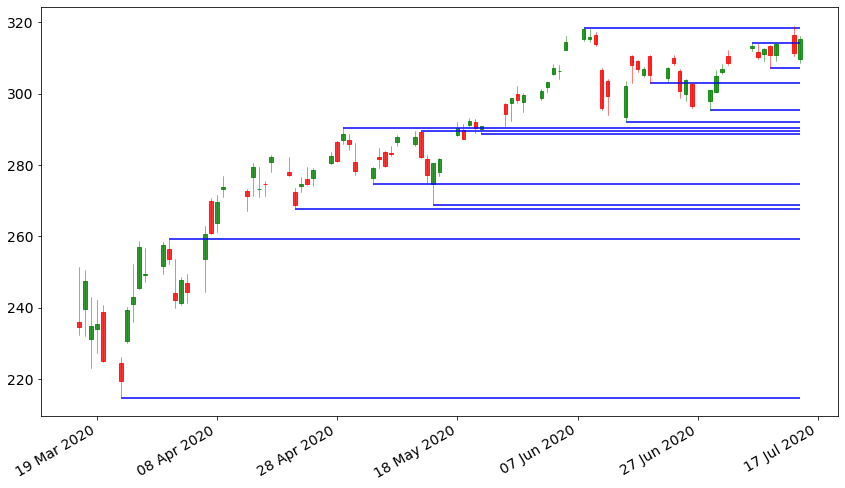

In [9]:
plot_all()


In [10]:
s =  np.mean(df['High'] - df['Low'])


In [11]:
def isFarFromLevel(l):
      return np.sum([abs(l-x) < s  for x in levels]) == 0
    


In [12]:
levels = []
for i in range(2,df.shape[0]-2):
    if isSupport(df,i):
        l = df['Low'][i]

        if isFarFromLevel(l):
              levels.append((i,l))
    elif isResistance(df,i):
        l = df['High'][i]

        if isFarFromLevel(l):
              levels.append((i,l))

In [13]:
levels

[(5, 214.81508310580784),
 (11, 259.1737234470435),
 (25, 267.7265487449145),
 (31, 290.22574694620056),
 (58, 318.30546245571827),
 (67, 303.01949554989443)]

<ipython-input-8-480e665b41e3>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


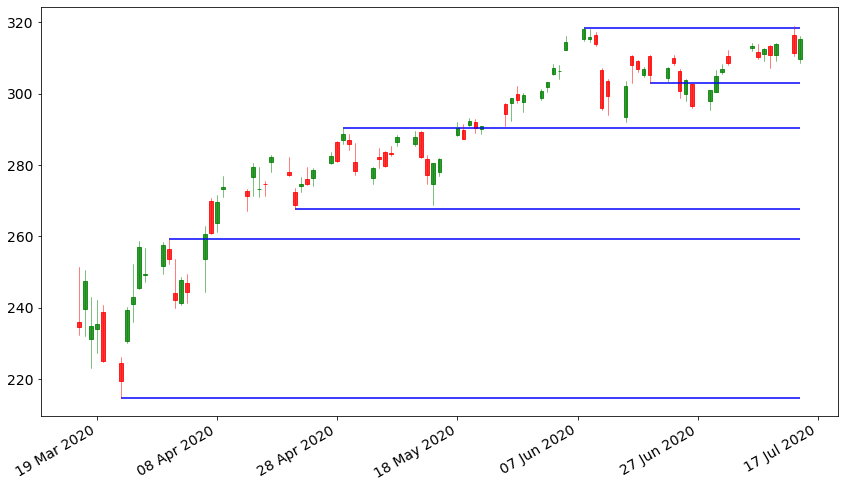

In [14]:
plot_all()
